In [ ]:
# Predicting CO₂ Storage Capacity: A Data-Driven Approach with Well Log Analysis

## 1. Introduction:
This project uses geological data from the Smeaheia well logs to predict CO₂ storage capacity. The aim is to understand the relationship between well log features and CO₂ storage potential.


In [ ]:
## 2. Importing Required Libraries
We begin by importing the libraries necessary for performing data analysis, and creating visualizations.


In [1]:
pip install lasio

Note: you may need to restart the kernel to use updated packages.


In [4]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline


In [ ]:
## 3. Data Loading and Preprocessing
We load datasets, choose parameter columnns for analysis, check for duplicates, handle missing values, check data types, and rename columns for clarity


In [5]:
# Load Dataset 
las = lasio.read(r"C:\Users\Joy\OneDrive\Ambiente de Trabalho\CO2_Storage_Analysis\data\Smeaheia 32 2-1 Well log data")

# Convert to DataFrame for easy manipulation
Smeaheia_Norway_Well_log_data = las.df()

# Display the first few rows to verify
Smeaheia_Norway_Well_log_data.head()

,INPUTINTERVALVELOCITY-(STUDY1)32/2-1SYNTHETICGENERATION,OUTPUTINTERVALVELOCITY-(STUDY1)32/2-1SYNTHETICGENERATION,RC-(STUDY1)32/2-1SYNTHETICGENERATION,DRIFT-(STUDY1)32/2-1SYNTHETICGENERATION,AI,RESAMPLEDAI,AC:1,AC:2,ACS:1,ACS:2,...,RHOB,RMED:1,RMED:2,ROP,RSHA,SWE,VOL_UWAT,VSH,ZCOR,GENERALTIME1
DEPT:1,,,,,,,,,,,,,,,,,,,,,
0.00,1470.777588,1470.777588,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26.00,1470.777588,1470.777588,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
377.00,1470.777588,1470.777588,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.629364
387.03,1470.777588,1470.777588,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.448318
404.17,1470.777588,1470.777588,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257.101044


In [7]:
# Relevant parameter columns for analysis
Smeaheia_Norway_Well_log_data_columns = ['DEPTH:1', 'DEPTH:2', 'PHIE:1', 'PHIE:2', 'PHIT:1', 'PHIT:2',
                                        'DEN:1', 'DEN:2', 'DENC', 'GR:1', 'GR:2', 'GR:3', 'AI', 'RDEP:1',
                                        'RDEP:2', 'VSH']

# Select the relevant columns from the dataframe
Smeaheia_Norway_Well_log_data_columns_selected = Smeaheia_Norway_Well_log_data[Smeaheia_Norway_Well_log_data_columns]

# Display the first 100 rows of the selected data
Smeaheia_Norway_Well_log_data_columns_selected.head(700)


,DEPTH:1,DEPTH:2,PHIE:1,PHIE:2,PHIT:1,PHIT:2,DEN:1,DEN:2,DENC,GR:1,GR:2,GR:3,AI,RDEP:1,RDEP:2,VSH
DEPT:1,,,,,,,,,,,,,,,,
0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387.0300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404.1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016.9652,1016.965210,1016.965210,0.2427,0.2427,0.2776,0.2776,2.174287,2.182055,0.157547,78.892624,76.425537,78.579163,5868.291016,0.713579,0.702516,0.1910
1017.5748,1017.574829,1017.574829,0.2427,0.2427,0.2776,0.2776,2.169699,2.164766,0.085863,70.901428,74.497963,70.049721,5997.091797,0.662122,0.653693,0.1911
1018.1844,1018.184387,1018.184387,0.2926,0.2926,0.2971,0.2971,2.129401,2.121251,0.060457,71.937370,71.426270,72.292084,5594.248535,0.728296,0.733889,0.0246


In [8]:
# Display information about the DataFrame before dropping duplicates
Smeaheia_Norway_Well_log_data_columns_selected.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 0.0 to 1282.68
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH:1  619 non-null    float64
 1   DEPTH:2  619 non-null    float64
 2   PHIE:1   616 non-null    float64
 3   PHIE:2   616 non-null    float64
 4   PHIT:1   616 non-null    float64
 5   PHIT:2   616 non-null    float64
 6   DEN:1    711 non-null    float64
 7   DEN:2    712 non-null    float64
 8   DENC     713 non-null    float64
 9   GR:1     1114 non-null   float64
 10  GR:2     1114 non-null   float64
 11  GR:3     1114 non-null   float64
 12  AI       710 non-null    float64
 13  RDEP:1   1112 non-null   float64
 14  RDEP:2   1113 non-null   float64
 15  VSH      616 non-null    float64
dtypes: float64(16)
memory usage: 148.8 KB


In [9]:
# Check for exact duplicate rows
duplicates_rows = Smeaheia_Norway_Well_log_data_columns_selected.duplicated()

# Check for exact duplicate columns (by transposing the dataset)
duplicates_columns = Smeaheia_Norway_Well_log_data_columns_selected.T.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates_rows.sum()}")

# Display the number of duplicate columns
print(f"Number of duplicate columns: {duplicates_columns.sum()}")


Number of duplicate rows: 5
Number of duplicate columns: 3


In [10]:
# Drop duplicate rows
Smeaheia_Norway_Well_log_data_cleaned = Smeaheia_Norway_Well_log_data_columns_selected.drop_duplicates()

# Drop duplicate columns
Smeaheia_Norway_Well_log_data_cleaned_no_columns = Smeaheia_Norway_Well_log_data_cleaned.loc[:, ~duplicates_columns]

# Display cleaned data
Smeaheia_Norway_Well_log_data_cleaned_no_columns.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 0.0 to 1282.68
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH:1  619 non-null    float64
 1   PHIE:1   616 non-null    float64
 2   PHIT:1   616 non-null    float64
 3   DEN:1    711 non-null    float64
 4   DEN:2    712 non-null    float64
 5   DENC     713 non-null    float64
 6   GR:1     1114 non-null   float64
 7   GR:2     1114 non-null   float64
 8   GR:3     1114 non-null   float64
 9   AI       710 non-null    float64
 10  RDEP:1   1112 non-null   float64
 11  RDEP:2   1113 non-null   float64
 12  VSH      616 non-null    float64
dtypes: float64(13)
memory usage: 122.0 KB


In [11]:
# Check for missing values in each column
missing_values_columns = Smeaheia_Norway_Well_log_data_cleaned_no_columns.isnull().sum()

# Display the number of missing values in each column
print(f"Missing values in each column:\n{missing_values_columns}")


Missing values in each column:
DEPTH:1    496
PHIE:1     499
PHIT:1     499
DEN:1      404
DEN:2      403
DENC       402
GR:1         1
GR:2         1
GR:3         1
AI         405
RDEP:1       3
RDEP:2       2
VSH        499
dtype: int64


In [12]:
# Check How Many Rows Have Missing Values in Other Key Columns to evaluate dropping rows impact on other columns
# Check rows where DEPTH:1 is missing
missing_depth_rows = Smeaheia_Norway_Well_log_data_cleaned_no_columns[Smeaheia_Norway_Well_log_data_cleaned_no_columns['DEPTH:1'].isnull()]

# Check how many of these rows have missing values in other key columns
missing_values_in_other_columns = missing_depth_rows.isnull().sum()
print(f"Missing values in other columns for rows with missing DEPTH:1:\n{missing_values_in_other_columns}")


Missing values in other columns for rows with missing DEPTH:1:
DEPTH:1    496
PHIE:1     496
PHIT:1     496
DEN:1      404
DEN:2      403
DENC       402
GR:1         1
GR:2         1
GR:3         1
AI         403
RDEP:1       3
RDEP:2       2
VSH        496
dtype: int64


In [13]:
# Drop rows where DEPTH:1 has missing values
Smeaheia_Norway_Well_log_data_cleaned_no_columns = Smeaheia_Norway_Well_log_data_cleaned_no_columns.dropna(subset=['DEPTH:1'])


In [14]:
# Fill missing DEN:2 and DENC with the median
Smeaheia_Norway_Well_log_data_cleaned_no_columns['DEN:2'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['DEN:2'].fillna(Smeaheia_Norway_Well_log_data_cleaned_no_columns['DEN:2'].median())
Smeaheia_Norway_Well_log_data_cleaned_no_columns['DENC'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['DENC'].fillna(Smeaheia_Norway_Well_log_data_cleaned_no_columns['DENC'].median())
Smeaheia_Norway_Well_log_data_cleaned_no_columns['PHIE:1'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['PHIE:1'].fillna(Smeaheia_Norway_Well_log_data_cleaned_no_columns['PHIE:1'].median())
Smeaheia_Norway_Well_log_data_cleaned_no_columns['PHIT:1'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['PHIT:1'].fillna(Smeaheia_Norway_Well_log_data_cleaned_no_columns['PHIT:1'].median())
Smeaheia_Norway_Well_log_data_cleaned_no_columns['AI'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['AI'].fillna(Smeaheia_Norway_Well_log_data_cleaned_no_columns['AI'].median())
Smeaheia_Norway_Well_log_data_cleaned_no_columns['VSH'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['VSH'].fillna(Smeaheia_Norway_Well_log_data_cleaned_no_columns['VSH'].median())


In [15]:
# Forward fill missing values in GR and RDEP columns
Smeaheia_Norway_Well_log_data_cleaned_no_columns['GR:1'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['GR:1'].fillna(method='ffill')
Smeaheia_Norway_Well_log_data_cleaned_no_columns['GR:2'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['GR:2'].fillna(method='ffill')
Smeaheia_Norway_Well_log_data_cleaned_no_columns['GR:3'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['GR:3'].fillna(method='ffill')
Smeaheia_Norway_Well_log_data_cleaned_no_columns['RDEP:1'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['RDEP:1'].fillna(method='ffill')
Smeaheia_Norway_Well_log_data_cleaned_no_columns['RDEP:2'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['RDEP:2'].fillna(method='ffill')


In [16]:
# Check for any missing values after filling and dropping rows
missing_values_after_filling = Smeaheia_Norway_Well_log_data_cleaned_no_columns.isnull().sum()
print(f"Missing values after final filling:\n{missing_values_after_filling}")


Missing values after final filling:
DEPTH:1    0
PHIE:1     0
PHIT:1     0
DEN:1      0
DEN:2      0
DENC       0
GR:1       0
GR:2       0
GR:3       0
AI         0
RDEP:1     0
RDEP:2     0
VSH        0
dtype: int64


In [17]:
# Check data types of the columns
print(Smeaheia_Norway_Well_log_data_cleaned_no_columns.dtypes)


DEPTH:1    float64
PHIE:1     float64
PHIT:1     float64
DEN:1      float64
DEN:2      float64
DENC       float64
GR:1       float64
GR:2       float64
GR:3       float64
AI         float64
RDEP:1     float64
RDEP:2     float64
VSH        float64
dtype: object


In [18]:
# Rename columns for easier readability
Smeaheia_Norway_Well_log_data_cleaned_no_columns.rename(columns={
    'DEPTH:1': 'Depth_1',
    'PHIE:1': 'Effective_Porosity',
    'PHIT:1': 'Total_Porosity',
    'DEN:1': 'Density_1',
    'DEN:2': 'Density_2',
    'DENC': 'Corrected_Density',
    'GR:1': 'Gamma_Ray_1',
    'GR:2': 'Gamma_Ray_2',
    'GR:3': 'Gamma_Ray_3',
    'AI': 'Acoustic_Impedance',
    'RDEP:1': 'Resistivity_1',
    'RDEP:2': 'Resistivity_2',
    'VSH': 'Shale_Volume'
}, inplace=True)

# Display the updated columns
print(Smeaheia_Norway_Well_log_data_cleaned_no_columns.columns)


Index(['Depth_1', 'Effective_Porosity', 'Total_Porosity', 'Density_1',
       'Density_2', 'Corrected_Density', 'Gamma_Ray_1', 'Gamma_Ray_2',
       'Gamma_Ray_3', 'Acoustic_Impedance', 'Resistivity_1', 'Resistivity_2',
       'Shale_Volume'],
      dtype='object')


In [19]:
# Get a statistical summary of the dataset
summary_stats = Smeaheia_Norway_Well_log_data_cleaned_no_columns.describe()

# Display the summary
print(summary_stats)


           Depth_1  Effective_Porosity  Total_Porosity   Density_1  \
count   619.000000          619.000000      619.000000  619.000000   
mean   1085.639152            0.142027        0.204321    2.326096   
std     107.010532            0.096216        0.073302    0.145698   
min     900.531616            0.000000        0.000600    1.973301   
25%     992.885986            0.053250        0.141600    2.204957   
50%    1085.849976            0.134200        0.220850    2.312612   
75%    1178.204407            0.232450        0.270100    2.437933   
max    1282.680054            0.300000        0.300000    2.696881   

        Density_2  Corrected_Density  Gamma_Ray_1  Gamma_Ray_2  Gamma_Ray_3  \
count  619.000000         619.000000   619.000000   619.000000   619.000000   
mean     2.326281           0.093473    86.769146    86.709260    86.789505   
std      0.146184           0.046126    18.165290    17.230138    18.301712   
min      1.971670          -0.015631    44.311028    

In [ ]:
## 4. Exploratory Data Analysis (EDA)
In this section, we explore the relationships between the geological features (e.g., depth, gamma ray, density, porosity). Various visualizations help uncover patterns and trends.

# Visualizations:
- Depth vs. Gamma Ray (Shale vs Non-Shale): To understand the distinction between shale and non-shale formations
- Depth vs. Porosity (Effective and Total): To observe how porosity varies with depth.
- Depth vs. Density: To analyze rock properties
- Correlation Analysis: To explore how geological features correlate with each other and CO₂ storage capacity
    

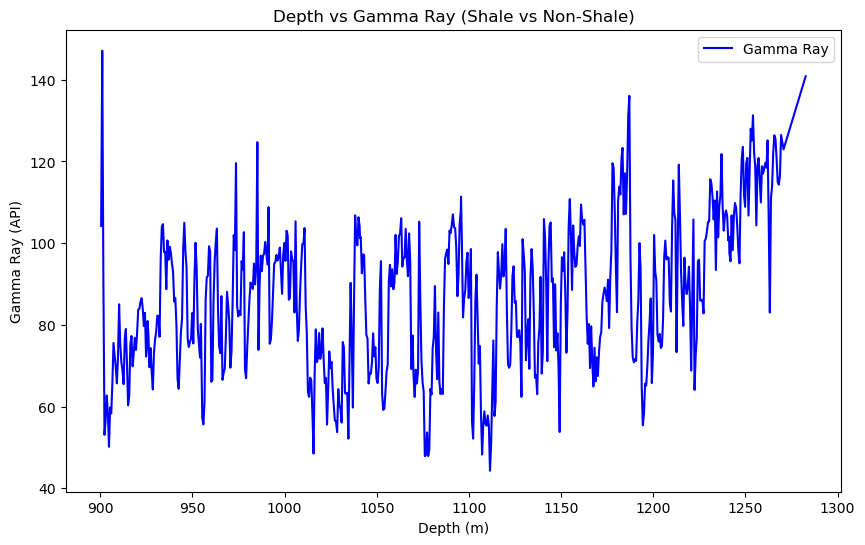

In [21]:
# Depth vs Gamma Ray (Shale vs Non-Shale)
plt.figure(figsize=(10, 6))
plt.plot(Smeaheia_Norway_Well_log_data_cleaned_no_columns['Depth_1'], 
         Smeaheia_Norway_Well_log_data_cleaned_no_columns['Gamma_Ray_1'], 
         label='Gamma Ray', color='blue')
plt.xlabel('Depth (m)')
plt.ylabel('Gamma Ray (API)')
plt.title('Depth vs Gamma Ray (Shale vs Non-Shale)')
plt.legend()
plt.show()


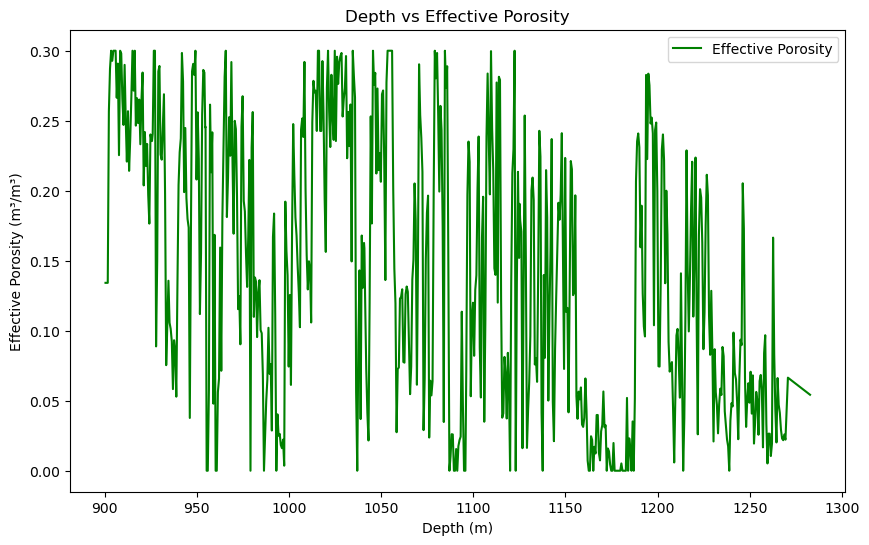

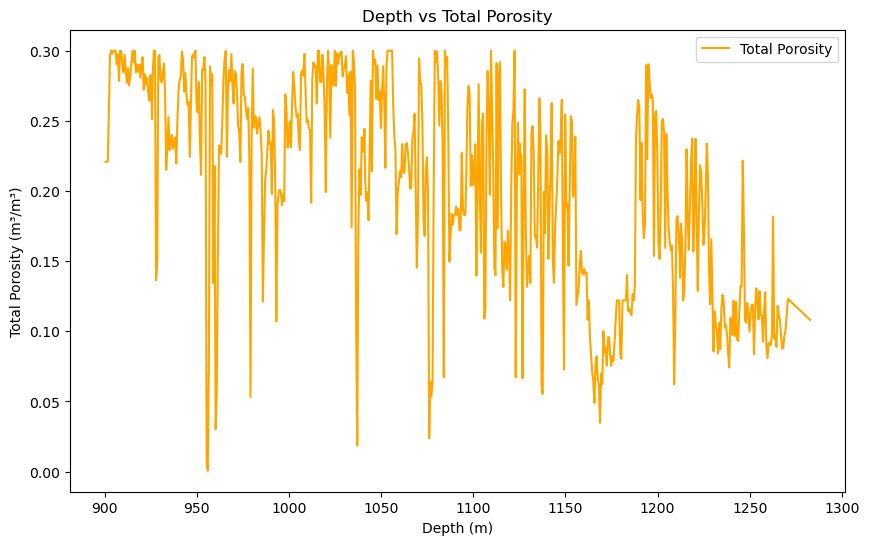

In [22]:
# Depth vs Effective Porosity
plt.figure(figsize=(10, 6))
plt.plot(Smeaheia_Norway_Well_log_data_cleaned_no_columns['Depth_1'], 
         Smeaheia_Norway_Well_log_data_cleaned_no_columns['Effective_Porosity'], 
         label='Effective Porosity', color='green')
plt.xlabel('Depth (m)')
plt.ylabel('Effective Porosity (m³/m³)')
plt.title('Depth vs Effective Porosity')
plt.legend()
plt.show()

# Depth vs Total Porosity
plt.figure(figsize=(10, 6))
plt.plot(Smeaheia_Norway_Well_log_data_cleaned_no_columns['Depth_1'], 
         Smeaheia_Norway_Well_log_data_cleaned_no_columns['Total_Porosity'], 
         label='Total Porosity', color='orange')
plt.xlabel('Depth (m)')
plt.ylabel('Total Porosity (m³/m³)')
plt.title('Depth vs Total Porosity')
plt.legend()
plt.show()

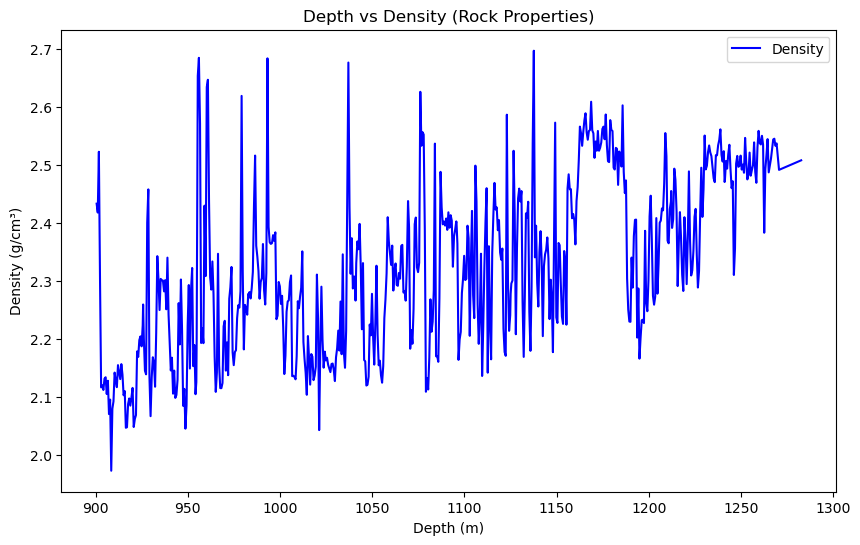

In [20]:
# Depth vs Density (Rock properties)
plt.figure(figsize=(10, 6))
plt.plot(Smeaheia_Norway_Well_log_data_cleaned_no_columns['Depth_1'], 
         Smeaheia_Norway_Well_log_data_cleaned_no_columns['Density_1'], 
         label='Density', color='blue')
plt.xlabel('Depth (m)')
plt.ylabel('Density (g/cm³)')
plt.title('Depth vs Density (Rock Properties)')
plt.legend()
plt.show()


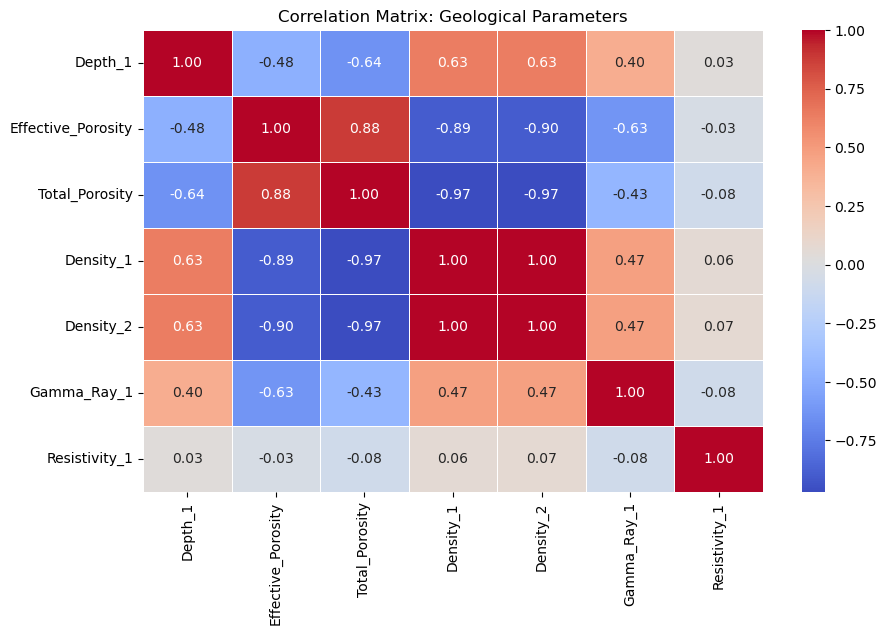

In [23]:
# Correlation matrix
corr_matrix = Smeaheia_Norway_Well_log_data_cleaned_no_columns[['Depth_1', 'Effective_Porosity', 'Total_Porosity', 'Density_1', 'Density_2', 'Gamma_Ray_1', 'Resistivity_1']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Geological Parameters')
plt.show()


In [ ]:
## 5. Insights from the Data
Key insights from the EDA:

- Depth vs Gamma Ray (Shale vs Non-Shale): Gamma Ray values fluctuate with depth, indicating alternating shale and non-shale layers, where higher Gamma Ray values correspond to shale presence.

- Depth vs Effective Porosity: Effective porosity shows varying levels with depth, indicating changes in rock composition or structural features that affect CO₂ storage potential.

- Depth vs Total Porosity: Total porosity also varies with depth, with higher values suggesting greater potential for CO₂ storage, though effective porosity is more relevant for fluid flow.

- Depth vs Density: Density increases with varying depths, implying multiple rock types within the reservoir, with some potentially more suitable for CO₂ storage due to lower density (higher porosity).
    
- Correlation Matrix Insights:
    - Depth correlates negatively with porosity.
    - Higher porosity correlates with lower density.
    - Gamma Ray has a positive correlation with porosity, indicating shale zones have higher porosity.
    - Resistivity has weak correlations with other geological parameters.


In [ ]:
## 6. Feature Engineering

# Create Interaction Features:
- Effective Porosity x Depth Interaction: To analyze how effective porosity at different depths influences CO₂ storage potential.
- Density x Depth Interaction: To understand the relationship between rock density and depth and its potential effect on CO₂ storage.
- Gamma Ray x Porosity Interaction: To highlight the impact of shale content (via Gamma Ray) and porosity on CO₂ storage.


In [24]:
# Creating the interaction features
Smeaheia_Norway_Well_log_data_cleaned_no_columns['Effective_Porosity_x_Depth'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['Effective_Porosity'] * Smeaheia_Norway_Well_log_data_cleaned_no_columns['Depth_1']
Smeaheia_Norway_Well_log_data_cleaned_no_columns['Density_x_Depth'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['Density_1'] * Smeaheia_Norway_Well_log_data_cleaned_no_columns['Depth_1']
Smeaheia_Norway_Well_log_data_cleaned_no_columns['Gamma_Ray_x_Porosity'] = Smeaheia_Norway_Well_log_data_cleaned_no_columns['Gamma_Ray_1'] * Smeaheia_Norway_Well_log_data_cleaned_no_columns['Effective_Porosity']

# Display the new columns
print(Smeaheia_Norway_Well_log_data_cleaned_no_columns[['Effective_Porosity_x_Depth', 'Density_x_Depth', 'Gamma_Ray_x_Porosity']].head())


          Effective_Porosity_x_Depth  Density_x_Depth  Gamma_Ray_x_Porosity
DEPT:1                                                                     
900.5316                  120.851349      2191.331659             13.985349
901.1412                  120.933152      2179.053233             19.741334
901.7508                  121.014963      2274.934939             12.233506
902.3604                  231.545675      2079.788708             13.624058
902.9700                  259.242667      1911.444357             16.283555


In [25]:
# Check for missing values in the interaction features
missing_values = Smeaheia_Norway_Well_log_data_cleaned_no_columns[['Effective_Porosity_x_Depth', 
                                                                  'Density_x_Depth', 
                                                                  'Gamma_Ray_x_Porosity']].isnull().sum()

print(missing_values)


Effective_Porosity_x_Depth    0
Density_x_Depth               0
Gamma_Ray_x_Porosity          0
dtype: int64


In [26]:
# Check the column names to ensure they are correct
print(Smeaheia_Norway_Well_log_data_cleaned_no_columns.columns)


Index(['Depth_1', 'Effective_Porosity', 'Total_Porosity', 'Density_1',
       'Density_2', 'Corrected_Density', 'Gamma_Ray_1', 'Gamma_Ray_2',
       'Gamma_Ray_3', 'Acoustic_Impedance', 'Resistivity_1', 'Resistivity_2',
       'Shale_Volume', 'Effective_Porosity_x_Depth', 'Density_x_Depth',
       'Gamma_Ray_x_Porosity'],
      dtype='object')


In [ ]:
## 7. Modeling and Prediction

# Data preparation:
- CO₂ storage efficiency is the target parameter, and the other columns are the features.
- For CO₂ storage efficiency, we will predict variables like Effective Porosity, Total Porosity, Gamma Ray. 

# Scaling:
- StandardScaler To scale the features, ensuring each feature has a mean of 0 and a standard deviation of 1.

# Modelling:
- Train a Linear Regression model using the scaled data.

# Model Evaluation:
- R-squared to evaluate how well the model fits the data.
- Mean Absolute Error (MAE) to understand the average prediction error.

# Visualizing Model Performance:
- Plot Actual vs Predicted values.
- Plot residuals: To evaluate if the model is making consistent errors across all predictions.
    

In [30]:
# Define target parameter (CO₂_storage_efficiency)
Smeaheia_Norway_Well_log_data_cleaned_no_columns['CO₂_storage_efficiency'] = (
    Smeaheia_Norway_Well_log_data_cleaned_no_columns['Effective_Porosity'] * 
    Smeaheia_Norway_Well_log_data_cleaned_no_columns['Density_1']
)


In [31]:
# Prepare data: Select input features and the target variable
X = Smeaheia_Norway_Well_log_data_cleaned_no_columns[['Effective_Porosity_x_Depth', 
                                                     'Density_x_Depth', 
                                                     'Gamma_Ray_x_Porosity']]
y = Smeaheia_Norway_Well_log_data_cleaned_no_columns['CO₂_storage_efficiency'] 

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")


R-squared: 0.9923499770901635
Mean Absolute Error: 0.013706875358196657


In [ ]:
# Model Evaluation:
- The model’s R-squared value (0.99) is excellent, indicating the model is a good fit for predicting CO₂ storage efficiency using well log data.
- The Mean Absolute Error (0.0137) is low, suggesting that the model is making relatively small errors in its predictions.


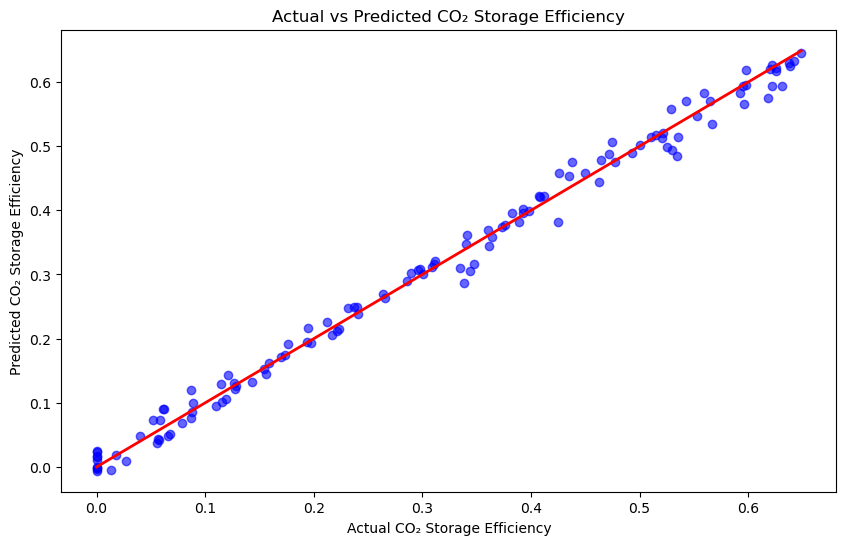

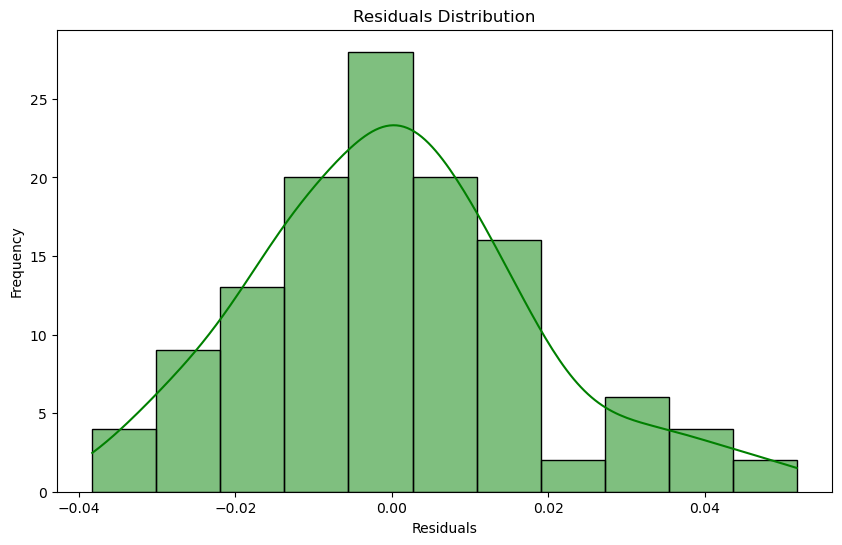

In [32]:
# Visualizing Model Performance

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted CO₂ Storage Efficiency')
plt.xlabel('Actual CO₂ Storage Efficiency')
plt.ylabel('Predicted CO₂ Storage Efficiency')
plt.show()

# Plotting Residuals (Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
## 8. Conclusion:

- The Linear Regression model performs well with an R-squared value of 0.9923, indicating it explains over 99% of the variance in CO₂ storage efficiency.

- The Mean Absolute Error of 0.0137 demonstrates that the model's predictions are fairly close to the actual values.

- While the model shows strong performance, there's always room for improvement. We can try more advanced models such as Random Forest or Gradient Boosting to explore if they provide better accuracy, especially for more complex relationships between features.

- The model's effectiveness was visually evaluated using actual vs predicted CO₂ storage efficiency plots and residuals, which demonstrated the model’s capability to generalize well on unseen data.
